In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from sklearn.linear_model import LinearRegression
import missingno as ms

In [57]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
df = sns.load_dataset('tips')

In [59]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [60]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [62]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [64]:
df.shape

(244, 7)

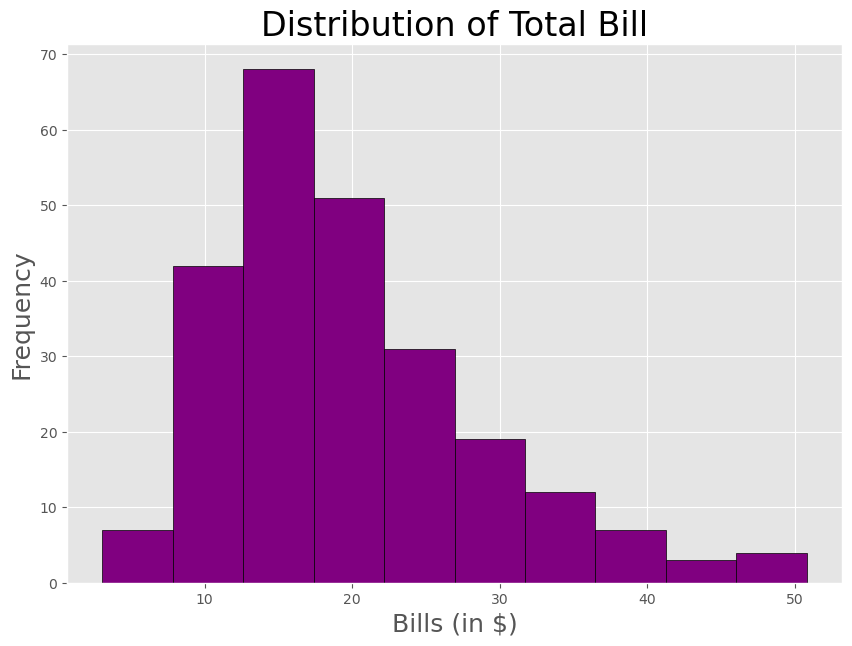

In [67]:
plt.style.use('ggplot')
# histogram of the weight
df.total_bill.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Total Bill', size=24)
plt.xlabel('Bills (in $)', size=18)
plt.ylabel('Frequency', size=18);

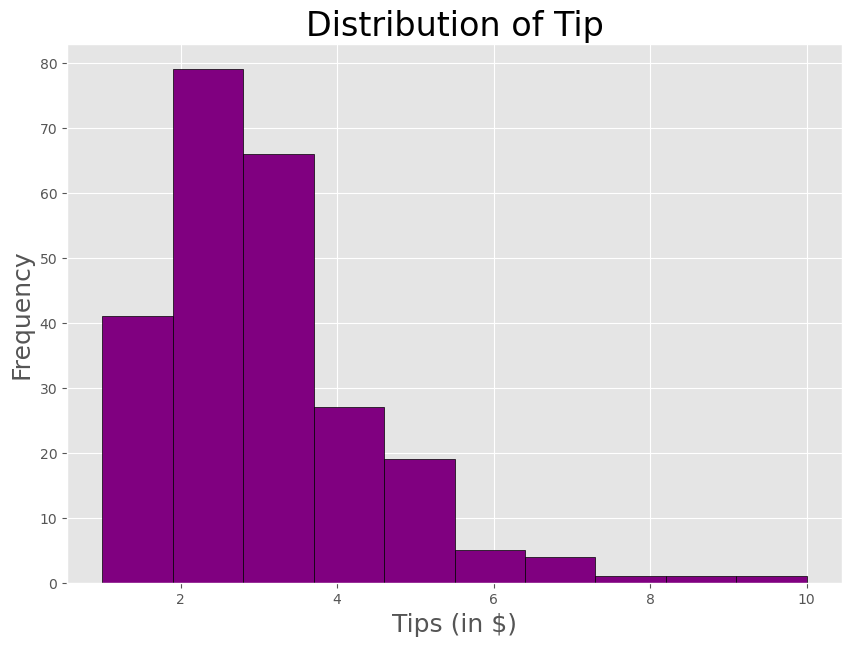

In [68]:
df.tip.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Tip', size=24)
plt.xlabel('Tips (in $)', size=18)
plt.ylabel('Frequency', size=18);

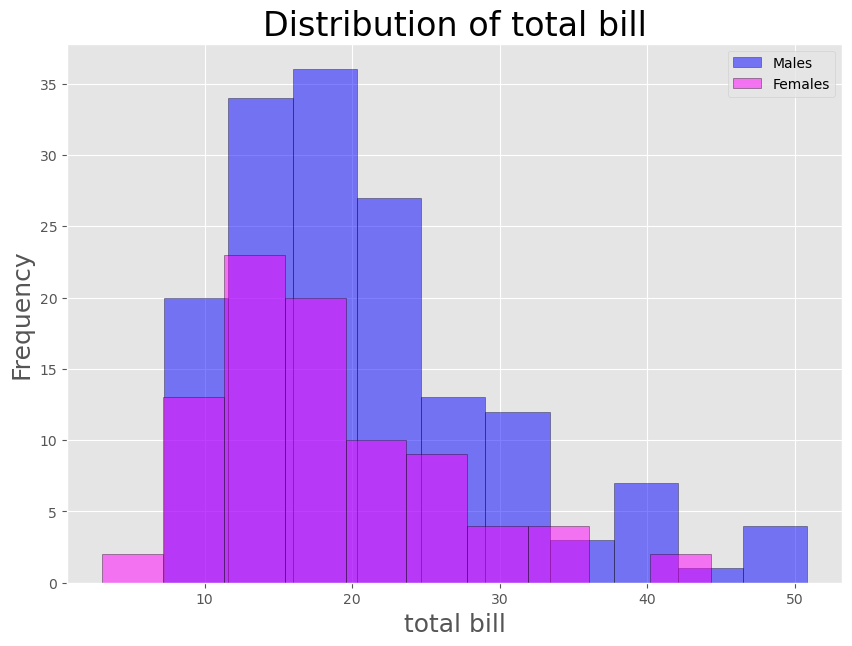

In [69]:
# histogram of the total billl - males and females

df[df['sex'] == 'Male'].total_bill.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'Female'].total_bill.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of total bill', size=24)
plt.xlabel('total bill', size=18)
plt.ylabel('Frequency', size=18);

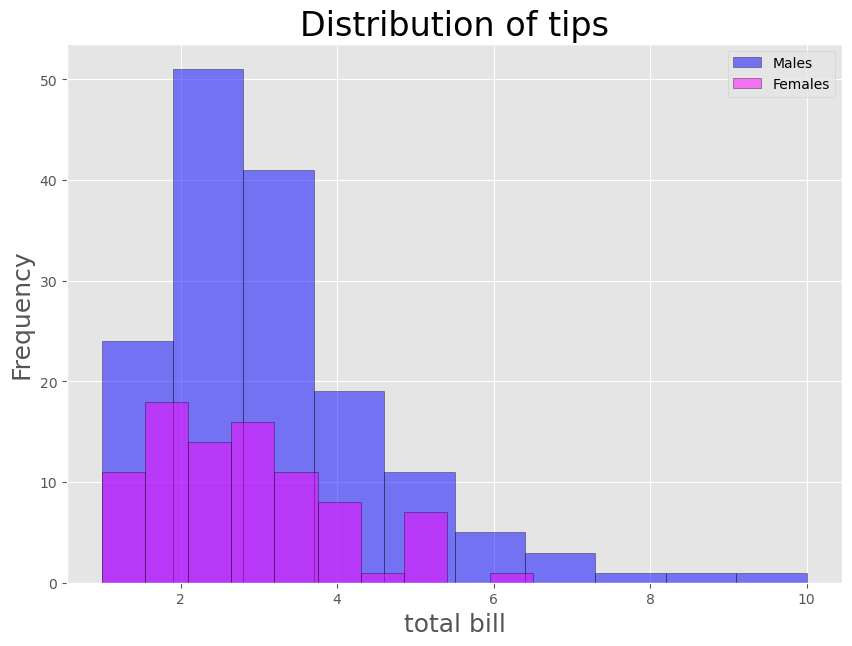

In [74]:
# histogram of the total billl - males and females

df[df['sex'] == 'Male'].tip.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'Female'].tip.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of tips', size=24)
plt.xlabel('total bill', size=18)
plt.ylabel('Frequency', size=18);

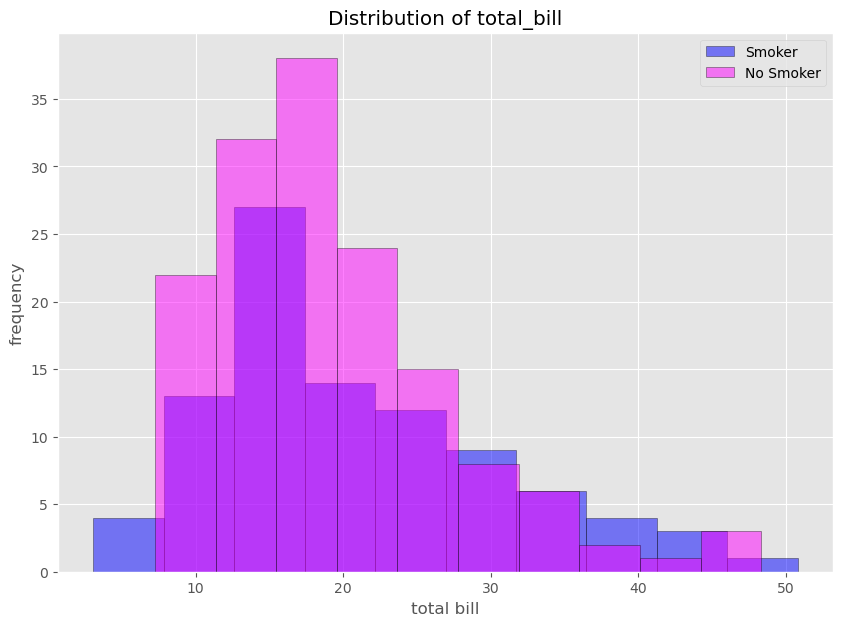

In [72]:
# histogram of the total billl - smoker and no smoker

df[df['smoker']=='Yes'].total_bill.plot(kind='hist', color='blue', edgecolor='black', alpha = 0.5, figsize=(10,7))
df[df['smoker']=='No'].total_bill.plot(kind='hist', color='magenta', edgecolor='black', alpha = 0.5, figsize=(10,7))
plt.legend(labels=['Smoker','No Smoker'])
plt.title('Distribution of total_bill')
plt.xlabel('total bill')
plt.ylabel('frequency');

Text(0, 0.5, 'frequency')

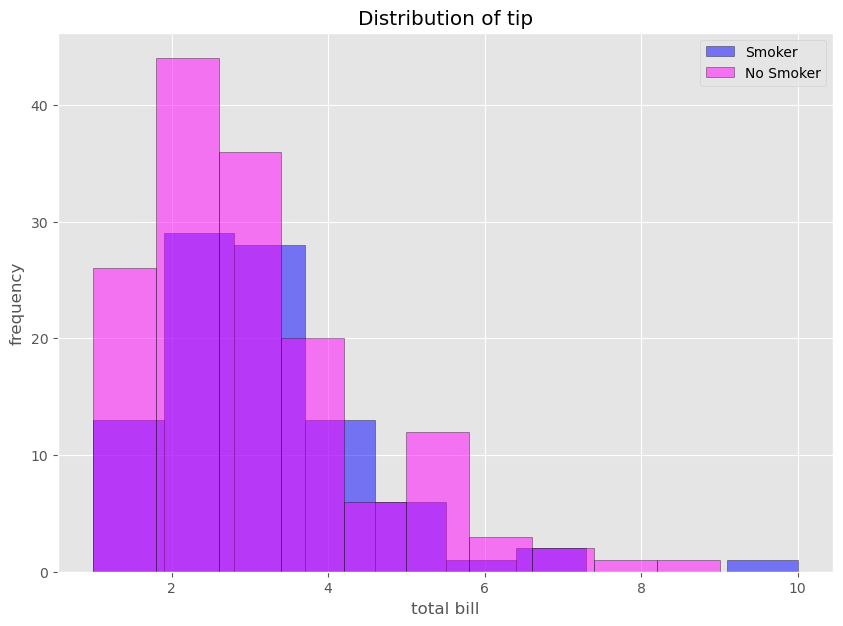

In [73]:
# histogram of the tip - smoker and no smoker

df[df['smoker']=='Yes'].tip.plot(kind='hist', color='blue', edgecolor='black', alpha = 0.5, figsize=(10,7))
df[df['smoker']=='No'].tip.plot(kind='hist', color='magenta', edgecolor='black', alpha = 0.5, figsize=(10,7))
plt.legend(labels=['Smoker','No Smoker'])
plt.title('Distribution of tip')
plt.xlabel('total bill')
plt.ylabel('frequency')

In [77]:
# Descriptive statistics for male

stat_male = df[df['sex']=='Male'].describe()
stat_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics for female
stat_female = df[df['sex']=='Female'].describe()
stat_female.rename(columns=lambda x: x + '_female', inplace=True)

j = pd.concat([stat_male,stat_female],axis=1)
j

,total_bill_male,tip_male,size_male,total_bill_female,tip_female,size_female
count,157.000000,157.000000,157.000000,87.000000,87.000000,87.000000
mean,20.744076,3.089618,2.630573,18.056897,2.833448,2.459770
std,9.246469,1.489102,0.955997,8.009209,1.159495,0.937644
min,7.250000,1.000000,1.000000,3.070000,1.000000,1.000000
25%,14.000000,2.000000,2.000000,12.750000,2.000000,2.000000
50%,18.350000,3.000000,2.000000,16.400000,2.750000,2.000000
75%,24.710000,3.760000,3.000000,21.520000,3.500000,3.000000
max,50.810000,10.000000,6.000000,44.300000,6.500000,6.000000


In [79]:
stat_smoker = df[df['smoker']=='Yes'].describe()
stat_smoker.rename(columns=lambda x: x + '_smoker', inplace=True)

stat_nosmoker = df[df['smoker']=='No'].describe()
stat_nosmoker.rename(columns=lambda x: x + '_no_smoker', inplace=True)

jd = pd.concat([stat_smoker,stat_nosmoker], axis=1)
jd

,total_bill_smoker,tip_smoker,size_smoker,total_bill_no_smoker,tip_no_smoker,size_no_smoker
count,93.000000,93.000000,93.000000,151.000000,151.000000,151.000000
mean,20.756344,3.008710,2.408602,19.188278,2.991854,2.668874
std,9.832154,1.401468,0.810751,8.255582,1.377190,1.017984
min,3.070000,1.000000,1.000000,7.250000,1.000000,1.000000
25%,13.420000,2.000000,2.000000,13.325000,2.000000,2.000000
50%,17.920000,3.000000,2.000000,17.590000,2.740000,2.000000
75%,26.860000,3.680000,3.000000,22.755000,3.505000,3.000000
max,50.810000,10.000000,5.000000,48.330000,9.000000,6.000000


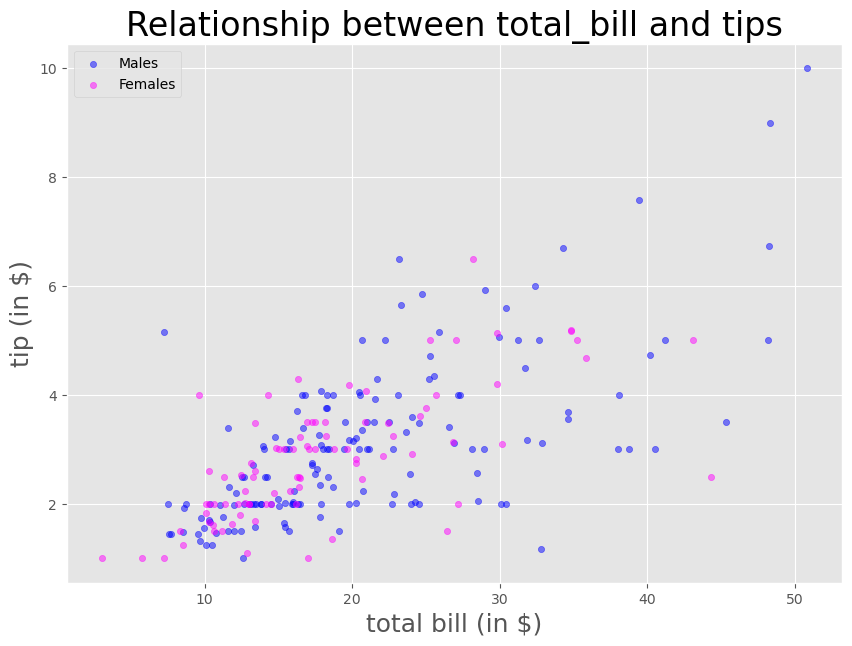

In [80]:
ax=df[df['sex'] == 'Male'].plot(kind='scatter', x='total_bill', y='tip', color='blue', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'Female'].plot(kind='scatter', x='total_bill', y='tip', color='magenta', alpha=0.5, figsize=(10 ,7),ax=ax)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between total_bill and tips', size=24)
plt.xlabel('total bill (in $)', size=18)
plt.ylabel('tip (in $)', size=18);

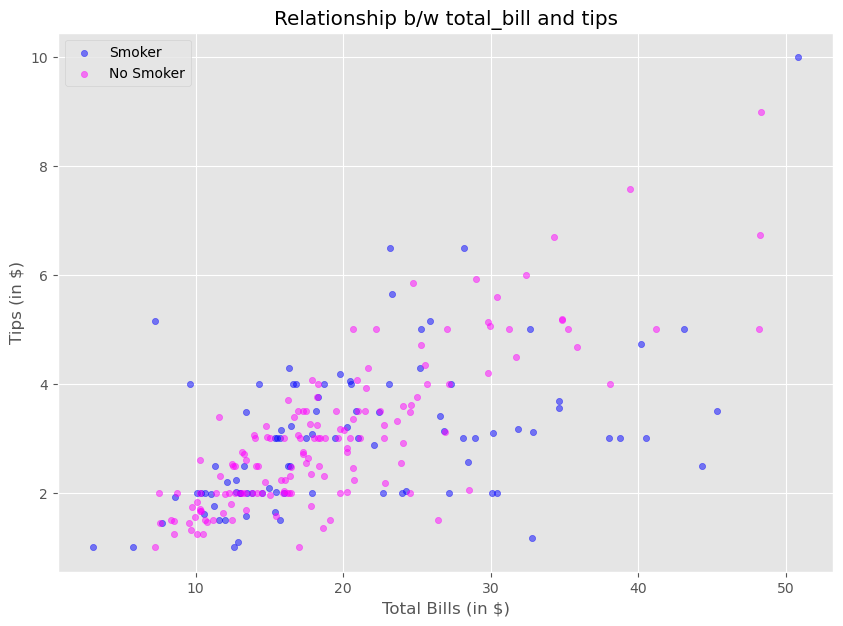

In [81]:
ax = df[df['smoker']=='Yes'].plot(kind='scatter', x='total_bill', y='tip', color='blue', alpha=0.5, figsize=(10,7))
df[df['smoker']=='No'].plot(kind='scatter', x='total_bill', y='tip', color='magenta', alpha=0.5, figsize=(10,7), ax=ax)
plt.legend(['Smoker','No Smoker'])
plt.title('Relationship b/w total_bill and tips')
plt.xlabel('Total Bills (in $)')
plt.ylabel('Tips (in $)');

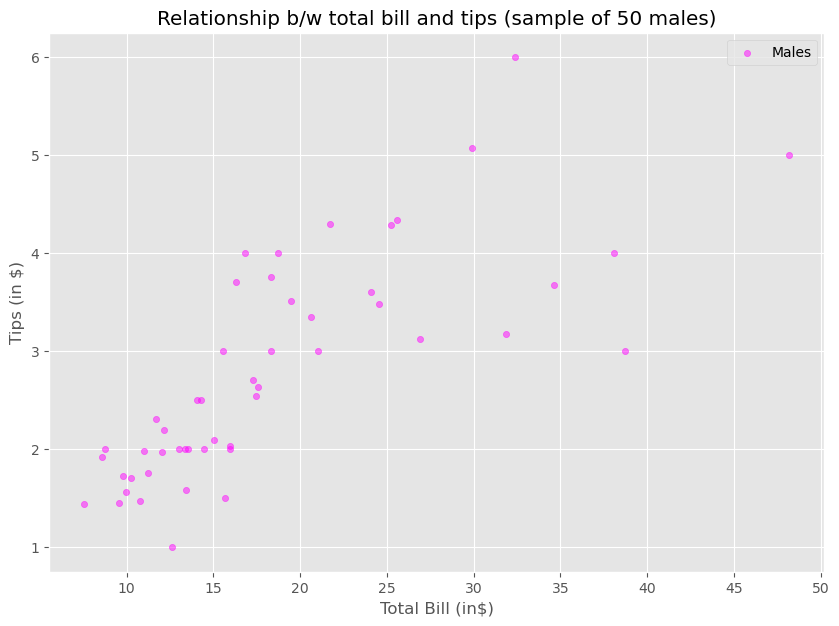

In [97]:
# Scatter plot of 50 males

sample_male = df[df['sex']=='Male'].sample(50)
sample_male.plot(kind='scatter', x='total_bill', y='tip', color='magenta', alpha=0.5, figsize=(10, 7))
plt.title('Relationship b/w total bill and tips (sample of 50 males)')
plt.legend(labels=['Males'])
plt.xlabel('Total Bill (in$)')
plt.ylabel('Tips (in $)');

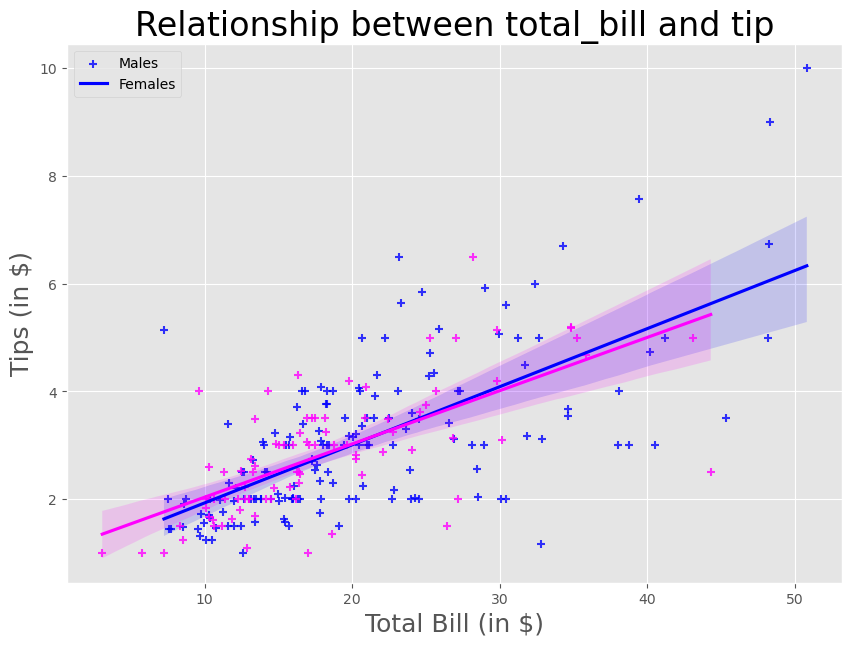

In [101]:
# regression plot using seaborn
df_Males = df[df['sex']=='Male']
df_Females = df[df['sex']=='Female']

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_Males.total_bill, y=df_Males.tip, color='blue', marker='+')
sns.regplot(x=df_Females.total_bill, y=df_Females.tip, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between total_bill and tip', size=24)
plt.xlabel('Total Bill (in $)', size=18)
plt.ylabel('Tips (in $)', size=18);

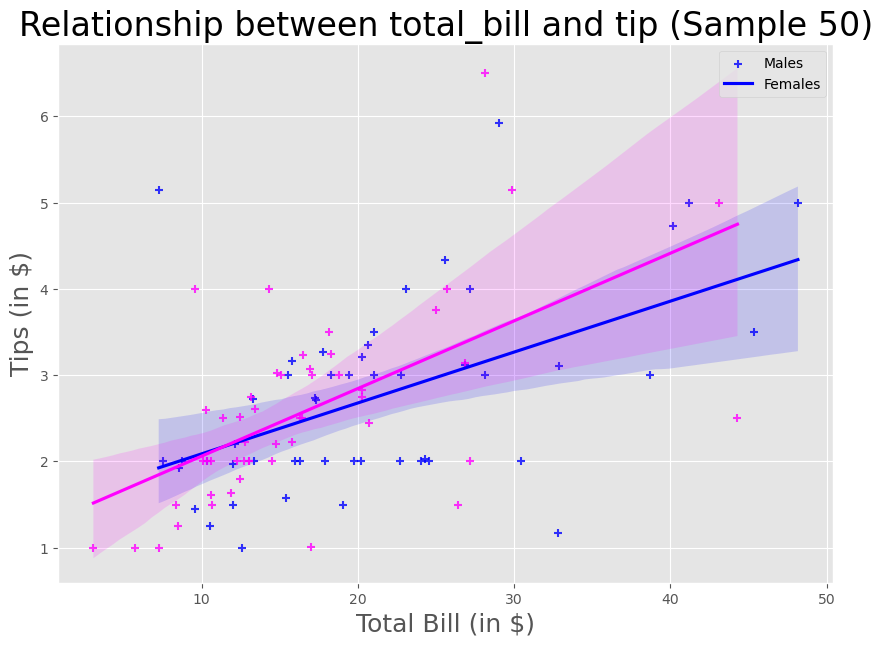

In [102]:
# regression plot using seaborn
df_Males = df[df['sex']=='Male'].sample(50)
df_Females = df[df['sex']=='Female'].sample(50)

fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_Males.total_bill, y=df_Males.tip, color='blue', marker='+')
sns.regplot(x=df_Females.total_bill, y=df_Females.tip, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between total_bill and tip (Sample 50)', size=24)
plt.xlabel('Total Bill (in $)', size=18)
plt.ylabel('Tips (in $)', size=18);

In [103]:
#Pearson correlation coefficient
# dataframe containing only males
df_males = df[df['sex'] == 'Male']

# correlation coefficients 
df_males.corr()

,total_bill,tip,size
total_bill,1.000000,0.669753,0.56881
tip,0.669753,1.000000,0.45519
size,0.568810,0.455190,1.00000


In [105]:
# dataframe containing only females
df_females = df[df['sex'] == 'Female']

# correlation coefficients 
df_females.corr()

,total_bill,tip,size
total_bill,1.000000,0.682999,0.651807
tip,0.682999,1.000000,0.566127
size,0.651807,0.566127,1.000000


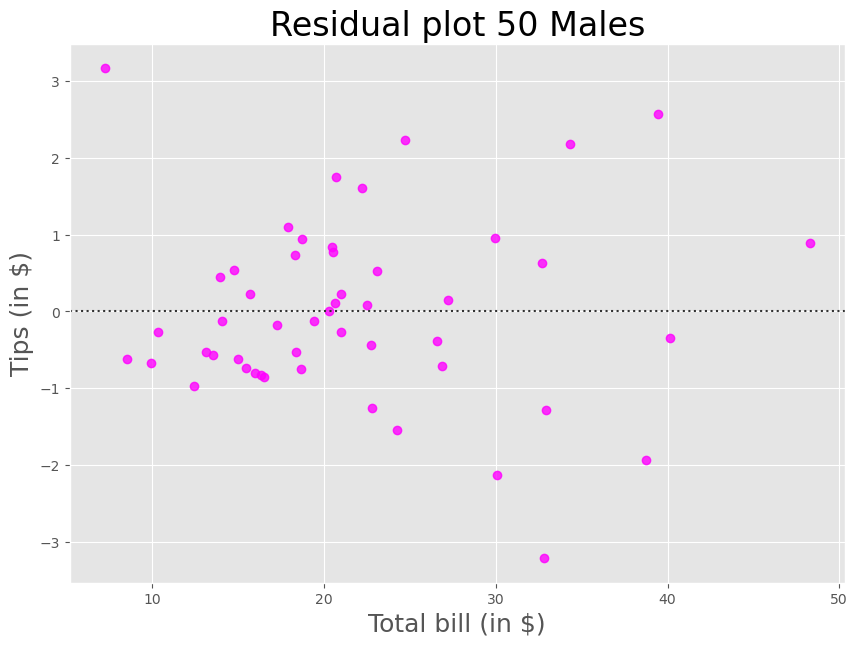

In [107]:
# Residual Plots

# dataframe containing only females
df_females = df[df['sex'] == 'Male'].sample(50)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.total_bill, df_females.tip, color='magenta')

# title and labels
plt.title('Residual plot 50 Males', size=24)
plt.xlabel('Total bill (in $)', size=18)
plt.ylabel('Tips (in $)', size=18);

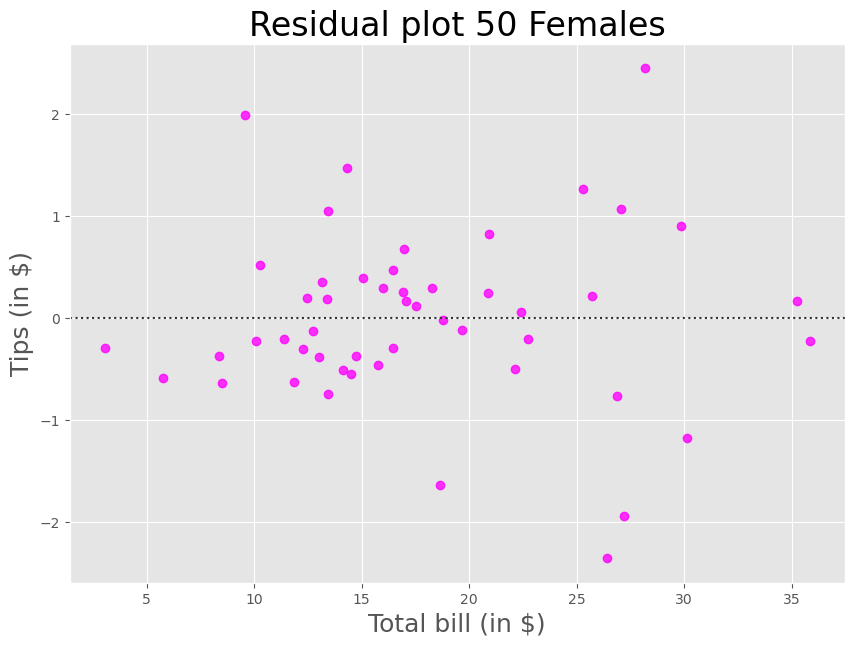

In [108]:
# Residual Plots

# dataframe containing only females
df_females = df[df['sex'] == 'Female'].sample(50)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.total_bill, df_females.tip, color='magenta')

# title and labels
plt.title('Residual plot 50 Females', size=24)
plt.xlabel('Total bill (in $)', size=18)
plt.ylabel('Tips (in $)', size=18);

In [109]:
# best fit polynomials
df_males = df[df['sex'] == 'Male']
df_females = df[df['sex'] == 'Female']

# polynomial - males
male_fit = np.polyfit(df_males.total_bill, df_males.tip, 1)


# polynomial - females
female_fit = np.polyfit(df_females.total_bill, df_females.tip, 1)

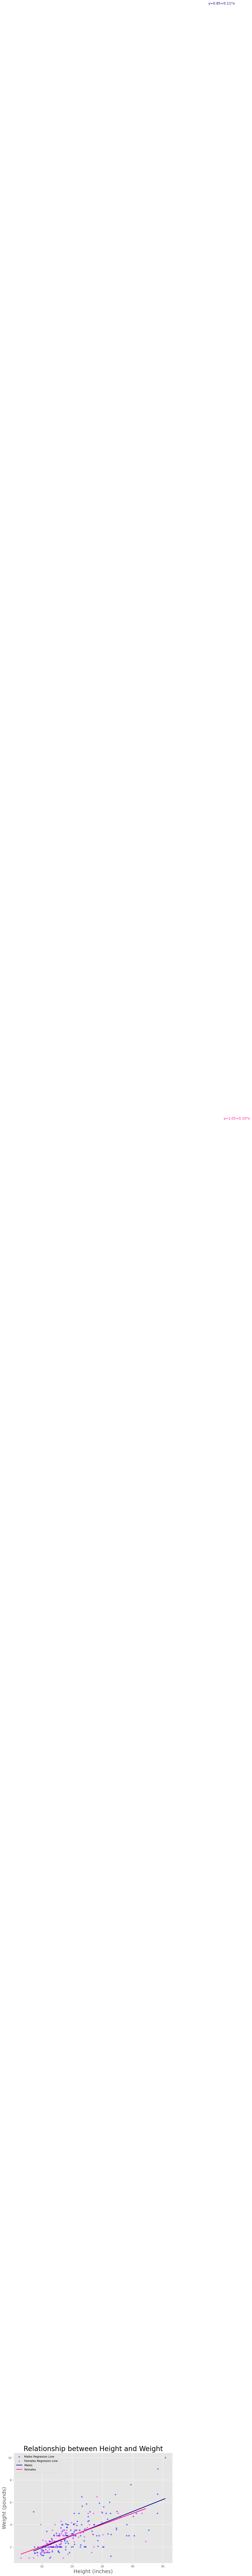

In [110]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['sex'] == 'Male']
df_females = df[df['sex'] == 'Female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='total_bill', y='tip', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='total_bill', y='tip', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.total_bill, male_fit[0] * df_males.total_bill + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.total_bill, female_fit[0] * df_females.total_bill + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between total bill and tips', size=24)
plt.xlabel('Total bill (in $)', size=18)
plt.ylabel('Tips (in $)', size=18);

In [112]:
df_males = df[df['sex'] == 'Male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['total_bill']], df_males['tip'])

# get the slope and intercept of the line best fit
print("Intercept of male : ",lr_males.intercept_)

print("Regression Coefficient/ Slope of Male : {}".format(lr_males.coef_))


df_females = df[df['sex'] == 'Female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['total_bill']], df_females['tip'])

# get the slope and intercept of the line best fit
print("Intercept of Female : ",lr_females.intercept_)

print("Regression Coefficient/ Slope of Female : {}".format(lr_females.coef_))

Intercept of male :  0.852147693932261
Regression Coefficient/ Slope of Male : [0.10786068]
Intercept of Female :  1.0480199036793039
Regression Coefficient/ Slope of Female : [0.09887792]
